In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#extracting data from git hub and finding Afghanistan from it
Source_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
covid_data= pd.read_csv(Source_url)
cd=covid_data
cd.shape
cd[10:1000]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
10,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
11,AFG,Asia,Afghanistan,2020-01-14,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
12,AFG,Asia,Afghanistan,2020-01-15,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
13,AFG,Asia,Afghanistan,2020-01-16,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
14,AFG,Asia,Afghanistan,2020-01-17,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,AFG,Asia,Afghanistan,2022-09-24,198216.0,193.0,170.429,7796.0,0.0,0.286,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
996,AFG,Asia,Afghanistan,2022-09-25,198283.0,67.0,171.571,7796.0,0.0,0.286,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
997,AFG,Asia,Afghanistan,2022-09-26,198455.0,172.0,160.286,7797.0,1.0,0.143,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
998,AFG,Asia,Afghanistan,2022-09-27,198583.0,128.0,158.143,7798.0,1.0,0.286,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## Visualisations of Chart

In [10]:
# Filter data for Afghanistan and Pakistan
afghanistan_data = cd[cd['location'] == 'Afghanistan']
pakistan_data = cd[cd['location'] == 'Pakistan']

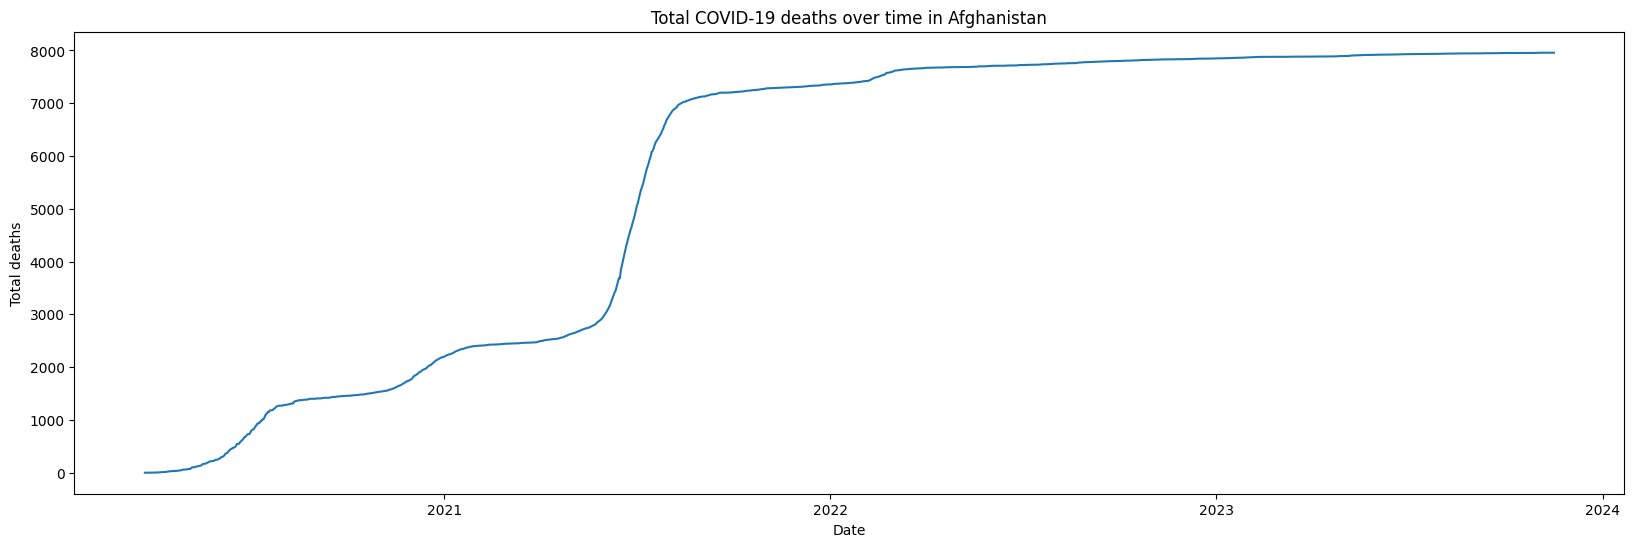

In [27]:
plt.figure(figsize=(20,6))
plt.plot(afghanistan_data['date'], afghanistan_data['total_deaths'])
plt.title('Total COVID-19 deaths over time in Afghanistan')
plt.xlabel('Date')
plt.ylabel('Total deaths')

# Format x-axis ticks as year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

The line graph illustrates the evolution of COVID-19 cases in Afghanistan over a period of time. I selected a line graph as it effectively represents time-series data. This graph displays the aggregate count of confirmed COVID-19 cases over the course of the pandemic.

### Box plot: Comparison of Afghanistan and Pakistan Total Covid Cases

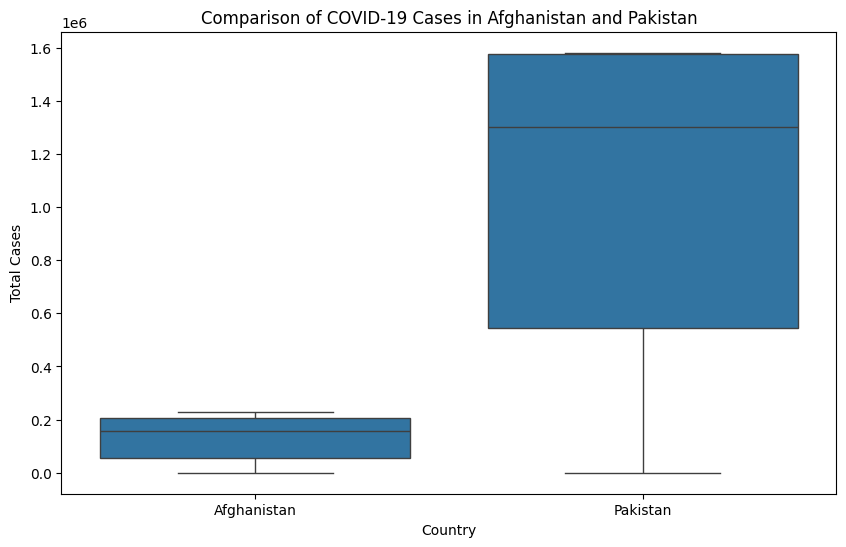

In [31]:
comparison_data = pd.concat([afghanistan_data, pakistan_data], keys=['Afghanistan', 'Pakistan'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=comparison_data.index.get_level_values(0), y='total_cases', data=comparison_data)
plt.title('Comparison of COVID-19 Cases in Afghanistan and Pakistan')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.show()

It combines the data from both countries and creates a visual representation of the distribution of cases. 
The plot helps in easily comparing the COVID-19 case data between Afghanistan and Pakistan.

### Pie chart: Number of Death per Population in Pakistan & Afghanistan


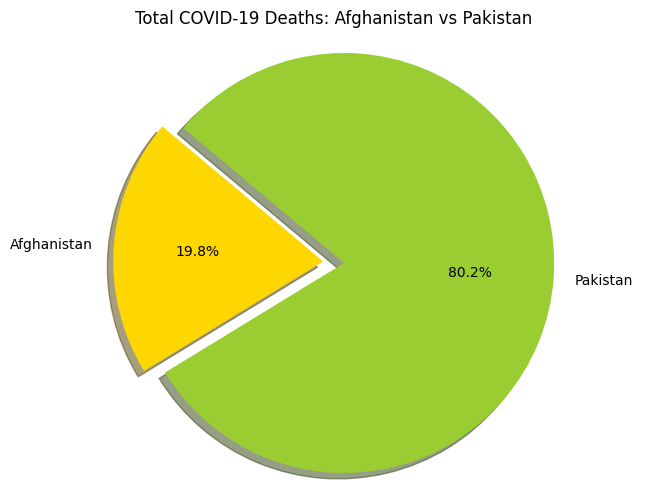

In [16]:
# Calculate total deaths in Afghanistan and Pakistan
total_deaths_afghanistan = afghanistan_data['total_deaths'].sum()
total_deaths_pakistan = pakistan_data['total_deaths'].sum()

# Data to plot
labels = ['Afghanistan', 'Pakistan']
sizes = [total_deaths_afghanistan, total_deaths_pakistan]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total COVID-19 Deaths: Afghanistan vs Pakistan')
plt.show()


The Pie chart shows the deaths per population of two countries.

## Heat Map of interrelationships among COVID-19 

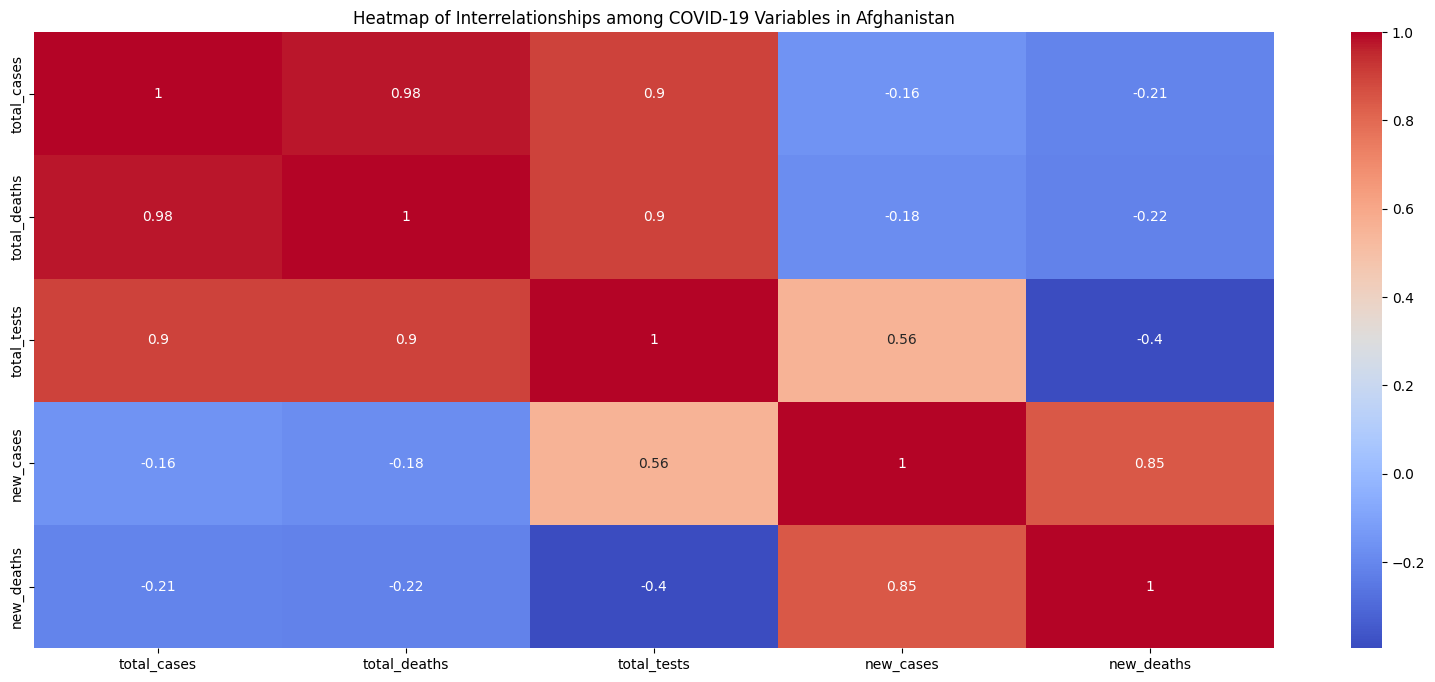

In [39]:
# Select variables of interest for Afghanistan
variables = ['total_cases', 'total_deaths', 'total_tests', 'new_cases', 'new_deaths']

# Filter data for Afghanistan
afghanistan_data = afghanistan_data[variables]

# Calculate correlation matrix
corr_matrix = afghanistan_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Interrelationships among COVID-19 Variables in Afghanistan')
plt.show()

It selects specific variables of interest, calculates the correlation matrix, and generates the heatmap using the Seaborn library. The heatmap visually represents the strength and direction of the correlations, providing insights into the relationships between different COVID-19 metrics in Afghanistan.

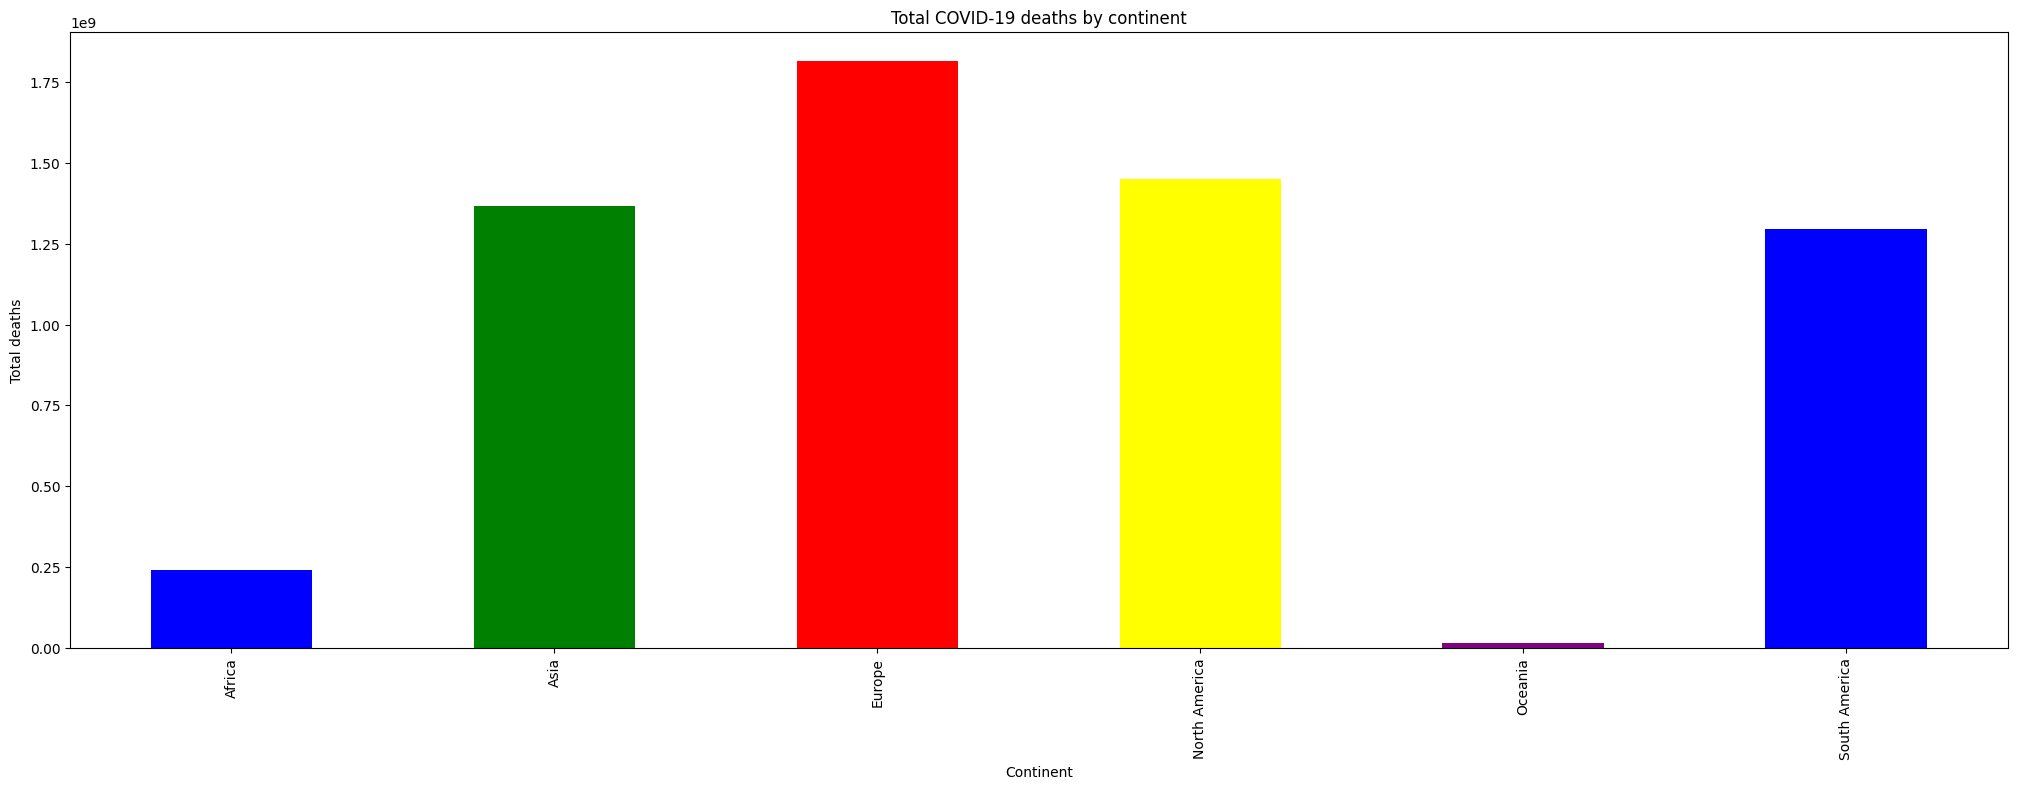

In [51]:
# Aggregate total deaths by continent
total_deaths_by_continent = cd.groupby('continent')['total_deaths'].sum()

# Create a grouped bar plot
plt.figure(figsize=(25,8))
total_deaths_by_continent.plot(kind='bar', color=['blue', 'green', 'red', 'yellow', 'purple'])
plt.title('Total COVID-19 deaths by continent')
plt.xlabel('Continent')
plt.ylabel('Total deaths')
plt.show()


The histogram above represents the total number of COVID-19 deaths by continent. Each bar in the histogram corresponds to a different continent, and the height of the bar indicates the total number of deaths in that continent. The colors of the bars are used to distinguish between the different continents. This visualization can help us understand the distribution of COVID-19 deaths across different continents.

